# Pandas Data Application in Pandas
https://lectures.quantecon.org/py/pandas_panel.html

2017-08-19 23:26:47 

In [164]:
import pandas as pd
pd.set_option('display.max_columns', 6)
# Reduce decimal points to 2

pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv(
    'https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/realwage.csv'
)

In [165]:
realwage.head()  # Show first 5 rows

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


## pivot_table

In [166]:
realwage = realwage.pivot_table(
    values='value', index='Time', columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...    \
Series     In 2015 constant prices at 2015 USD exchange rates  ...     
Pay period                                             Annual  ...     
Time                                                           ...     
2006-01-01                                          23,826.64  ...     
2007-01-01                                          24,616.84  ...     
2008-01-01                                          24,185.70  ...     
2009-01-01                                          24,496.84  ...     
2010-01-01                                          24,373.76  ...     

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

## to_datetime

In [183]:
realwage.index = pd.to_datetime(realwage.index)
realwage.index

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

## stack

In [168]:
realwage.stack(level='Country')

Series                    In 2015 constant prices at 2015 USD PPPs         \
Pay period                                                  Annual Hourly   
Time       Country                                                          
2006-01-01 Australia                                     20,410.65  10.33   
           Belgium                                       21,042.28  10.09   
           Brazil                                         3,310.51   1.41   
           Canada                                        13,649.69   6.56   
           Chile                                          5,201.65   2.22   
...                                                            ...    ...   
2016-01-01 Slovenia                                      14,520.80   6.96   
           Spain                                         12,317.41   5.06   
           Turkey                                        12,074.76   5.79   
           United Kingdom                                17,568.33   8.44   
           United States                                 14,892.12   7.16   

Series                    In 2015 constant prices at 2015 USD exchange rates  \
Pay period                                                            Annual   
Time       Country                                                             
2006-01-01 Australia                                               23,826.64   
           Belgium                                                 20,228.74   
           Brazil                                                   2,032.87   
           Canada                                                  14,335.12   
           Chile                                                    3,333.76   
...                                                                      ...   
2016-01-01 Slovenia                                                10,533.06   
           Spain                                                   10,191.91   
           Turkey                                                   6,741.96   
           United Kingdom                                          21,352.73   
           United States                                           14,892.12   

Series                            
Pay period                Hourly  
Time       Country                
2006-01-01 Australia       12.06  
           Belgium          9.70  
           Brazil           0.87  
           Canada           6.89  
           Chile            1.42  
...                          ...  
2016-01-01 Slovenia         5.05  
           Spain            4.19  
           Turkey           3.23  
           United Kingdom  10.26  
           United States    7.16  

[335 rows x 4 columns]

In [169]:
realwage['2015'].stack(level='Country')

Series                    In 2015 constant prices at 2015 USD PPPs         \
Pay period                                                  Annual Hourly   
Time       Country                                                          
2015-01-01 Australia                                     21,715.53  10.99   
           Belgium                                       21,588.12  10.35   
           Brazil                                         4,628.63   2.00   
           Canada                                        16,536.83   7.95   
           Chile                                          6,633.56   2.80   
...                                                            ...    ...   
           Slovenia                                      14,512.81   6.96   
           Spain                                         12,170.47   5.00   
           Turkey                                        10,062.42   4.82   
           United Kingdom                                17,125.45   8.23   
           United States                                 15,080.00   7.25   

Series                    In 2015 constant prices at 2015 USD exchange rates  \
Pay period                                                            Annual   
Time       Country                                                             
2015-01-01 Australia                                               25,349.90   
           Belgium                                                 20,753.48   
           Brazil                                                   2,842.28   
           Canada                                                  17,367.24   
           Chile                                                    4,251.49   
...                                                                      ...   
           Slovenia                                                10,527.26   
           Spain                                                   10,070.33   
           Turkey                                                   5,618.36   
           United Kingdom                                          20,814.46   
           United States                                           15,080.00   

Series                            
Pay period                Hourly  
Time       Country                
2015-01-01 Australia       12.83  
           Belgium          9.95  
           Brazil           1.21  
           Canada           8.35  
           Chile            1.81  
...                          ...  
           Slovenia         5.05  
           Spain            4.14  
           Turkey           2.69  
           United Kingdom  10.01  
           United States    7.25  

[32 rows x 4 columns]

In [170]:
realwage_c = realwage['2015'].stack(level=[1, 2]).transpose()  # no time index
realwage_c

Time                                         2015-01-01         \
Series         In 2015 constant prices at 2015 USD PPPs          
Pay period                                       Annual Hourly   
Country                                                          
Australia                                     21,715.53  10.99   
Belgium                                       21,588.12  10.35   
Brazil                                         4,628.63   2.00   
Canada                                        16,536.83   7.95   
Chile                                          6,633.56   2.80   
...                                                 ...    ...   
Slovenia                                      14,512.81   6.96   
Spain                                         12,170.47   5.00   
Turkey                                        10,062.42   4.82   
United Kingdom                                17,125.45   8.23   
United States                                 15,080.00   7.25   

Time                                                                      
Series         In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                 Annual Hourly  
Country                                                                   
Australia                                               25,349.90  12.83  
Belgium                                                 20,753.48   9.95  
Brazil                                                   2,842.28   1.21  
Canada                                                  17,367.24   8.35  
Chile                                                    4,251.49   1.81  
...                                                           ...    ...  
Slovenia                                                10,527.26   5.05  
Spain                                                   10,070.33   4.14  
Turkey                                                   5,618.36   2.69  
United Kingdom                                          20,814.46  10.01  
United States                                           15,080.00   7.25  

[32 rows x 4 columns]

## .xs

In [171]:
realwage_f = realwage.xs(
    ('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
    level=('Pay period', 'Series'),
    axis=1)
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...    \
Series     In 2015 constant prices at 2015 USD exchange rates  ...     
Pay period                                             Annual  ...     
Time                                                           ...     
2006-01-01                                          23,826.64  ...     
2007-01-01                                          24,616.84  ...     
2008-01-01                                          24,185.70  ...     
2009-01-01                                          24,496.84  ...     
2010-01-01                                          24,373.76  ...     

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [172]:
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


In [173]:
realwage.xs(('Annual', 'Brazil'), level=[2, 0], axis=1)  # () not []

Series,In 2015 constant prices at 2015 USD PPPs,In 2015 constant prices at 2015 USD exchange rates
Time,,
2006-01-01,"3,310.51","2,032.87"
2007-01-01,"3,525.45","2,164.86"
2008-01-01,"3,664.39","2,250.18"
2009-01-01,"3,934.77","2,416.21"
2010-01-01,"4,145.69","2,545.73"
...,...,...
2012-01-01,"4,498.38","2,762.30"
2013-01-01,"4,616.93","2,835.10"
2014-01-01,"4,636.71","2,847.25"


In [174]:
realwage.xs(('Annual', 'Brazil'), level=[2, 0], axis=1)  # () not []

Series,In 2015 constant prices at 2015 USD PPPs,In 2015 constant prices at 2015 USD exchange rates
Time,,
2006-01-01,"3,310.51","2,032.87"
2007-01-01,"3,525.45","2,164.86"
2008-01-01,"3,664.39","2,250.18"
2009-01-01,"3,934.77","2,416.21"
2010-01-01,"4,145.69","2,545.73"
...,...,...
2012-01-01,"4,498.38","2,762.30"
2013-01-01,"4,616.93","2,835.10"
2014-01-01,"4,636.71","2,847.25"


In [175]:
realwage_c.xs('Annual', level='Pay period', axis=1)

Time                                         2015-01-01  \
Series         In 2015 constant prices at 2015 USD PPPs   
Country                                                   
Australia                                     21,715.53   
Belgium                                       21,588.12   
Brazil                                         4,628.63   
Canada                                        16,536.83   
Chile                                          6,633.56   
...                                                 ...   
Slovenia                                      14,512.81   
Spain                                         12,170.47   
Turkey                                        10,062.42   
United Kingdom                                17,125.45   
United States                                 15,080.00   

Time                                                               
Series         In 2015 constant prices at 2015 USD exchange rates  
Country                                                            
Australia                                               25,349.90  
Belgium                                                 20,753.48  
Brazil                                                   2,842.28  
Canada                                                  17,367.24  
Chile                                                    4,251.49  
...                                                           ...  
Slovenia                                                10,527.26  
Spain                                                   10,070.33  
Turkey                                                   5,618.36  
United Kingdom                                          20,814.46  
United States                                           15,080.00  

[32 rows x 2 columns]

In [176]:
worlddata = pd.read_csv(
    'https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/countries.csv',
    sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


In [177]:
worlddata = worlddata[['Country (en)', 'Continent']]

In [178]:
worlddata.head(2)

,Country (en),Continent
0,Afghanistan,Asia
1,Egypt,Africa


In [179]:
worlddata = worlddata.rename(
    columns={'Country (en)': 'Country',
             'Continent': 'Continent'})
worlddata

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa
...,...,...
243,Wallis and Futuna,Oceania
244,Christmas Island,Australia
245,Western Sahara,Africa
246,Central African Republic,Africa


In [180]:
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


In [181]:
realwage_f.transpose().head()

Time,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
Country,,,,,,,
Australia,12.06,12.46,12.24,...,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,...,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,...,1.21,1.21,1.24
Canada,6.89,6.96,7.24,...,8.22,8.35,8.48
Chile,1.42,1.45,1.44,...,1.76,1.81,1.91


In [184]:
merged = pd.merge(
    realwage_f.transpose(),
    worlddata,
    how='left',
    left_index=True,
    right_on='Country')
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17,12.06,12.46,12.24,...,12.98,Australia,Australia
23,9.70,9.82,9.87,...,9.76,Belgium,Europe
32,0.87,0.92,0.96,...,1.24,Brazil,South America
100,6.89,6.96,7.24,...,8.48,Canada,North America
38,1.42,1.45,1.44,...,1.91,Chile,South America


In [185]:
merged[merged.Continent.isnull()]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
247,3.42,3.74,3.87,...,5.28,Korea,NaN
247,0.23,0.45,0.39,...,0.55,Russian Federation,NaN
247,1.50,1.64,1.71,...,2.08,Slovak Republic,NaN


## fillna

In [188]:
missing_continents = {
    'Korea': 'Asia',
    'Russian Federation': 'Europe',
    'Slovak Republic': 'Europe'
}

merged.Continent = merged['Continent'].fillna(
    merged.Country.map(missing_continents))

merged

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17,12.06,12.46,12.24,...,12.98,Australia,Australia
23,9.70,9.82,9.87,...,9.76,Belgium,Europe
32,0.87,0.92,0.96,...,1.24,Brazil,South America
100,6.89,6.96,7.24,...,8.48,Canada,North America
38,1.42,1.45,1.44,...,1.91,Chile,South America
...,...,...,...,...,...,...,...
198,3.92,3.88,3.96,...,5.05,Slovenia,Europe
200,3.99,4.10,4.14,...,4.19,Spain,Europe
227,2.27,2.26,2.22,...,3.23,Turkey,Asia
241,9.81,10.07,10.04,...,10.26,United Kingdom,Europe


In [189]:
merged[merged.Country == "Korea"]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
247,3.42,3.74,3.87,...,5.28,Korea,Asia


```merged.Country.map(missing_continents)``` creates an array of NaN for non missing continent and values for missing

`fillna` receives an array and replace the missings with the values from the input array

## to_replace

In [190]:
list_country = ['Central America', 'North America', 'South America']
for country in list_country:
    merged.Continent.replace(
        to_replace=country, value='Americas', inplace=True)

In [191]:
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17,12.06,12.46,12.24,...,12.98,Australia,Australia
23,9.70,9.82,9.87,...,9.76,Belgium,Europe
32,0.87,0.92,0.96,...,1.24,Brazil,Americas
100,6.89,6.96,7.24,...,8.48,Canada,Americas
38,1.42,1.45,1.44,...,1.91,Chile,Americas


## set_index

In [192]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01     ...      \
Continent Country                                            ...       
Americas  Brazil            0.87        0.92        0.96     ...       
          Canada            6.89        6.96        7.24     ...       
          Chile             1.42        1.45        1.44     ...       
          Colombia          1.01        1.02        1.01     ...       
          Costa Rica         nan         nan         nan     ...       

                      2014-01-01  2015-01-01  2016-01-01  
Continent Country                                         
Americas  Brazil            1.21        1.21        1.24  
          Canada            8.22        8.35        8.48  
          Chile             1.76        1.81        1.91  
          Colombia          1.13        1.13        1.12  
          Costa Rica        2.41        2.56        2.63  

[5 rows x 11 columns]

In [193]:
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged

Time                          2006-01-01  2007-01-01  2008-01-01     ...      \
Continent Country                                                    ...       
Americas  Brazil                    0.87        0.92        0.96     ...       
          Canada                    6.89        6.96        7.24     ...       
          Chile                     1.42        1.45        1.44     ...       
          Colombia                  1.01        1.02        1.01     ...       
          Costa Rica                 nan         nan         nan     ...       
...                                  ...         ...         ...     ...       
Europe    Russian Federation        0.23        0.45        0.39     ...       
          Slovak Republic           1.50        1.64        1.71     ...       
          Slovenia                  3.92        3.88        3.96     ...       
          Spain                     3.99        4.10        4.14     ...       
          United Kingdom            9.81       10.07       10.04     ...       

Time                          2014-01-01  2015-01-01  2016-01-01  
Continent Country                                                 
Americas  Brazil                    1.21        1.21        1.24  
          Canada                    8.22        8.35        8.48  
          Chile                     1.76        1.81        1.91  
          Colombia                  1.13        1.13        1.12  
          Costa Rica                2.41        2.56        2.63  
...                                  ...         ...         ...  
Europe    Russian Federation        0.61        0.56        0.55  
          Slovak Republic           2.08        2.08        2.08  
          Slovenia                  5.01        5.05        5.05  
          Spain                     4.10        4.14        4.19  
          United Kingdom            9.72       10.01       10.26  

[32 rows x 11 columns]

In [194]:
merged = merged.transpose()
merged.head()

Continent  Americas                   ...         Europe                     
Country      Brazil Canada Chile      ...       Slovenia Spain United Kingdom
Time                                  ...                                    
2006-01-01     0.87   6.89  1.42      ...           3.92  3.99           9.81
2007-01-01     0.92   6.96  1.45      ...           3.88  4.10          10.07
2008-01-01     0.96   7.24  1.44      ...           3.96  4.14          10.04
2009-01-01     1.03   7.67  1.52      ...           4.08  4.32          10.15
2010-01-01     1.08   7.94  1.56      ...           4.81  4.30           9.96

[5 rows x 32 columns]

## index.get_level_values

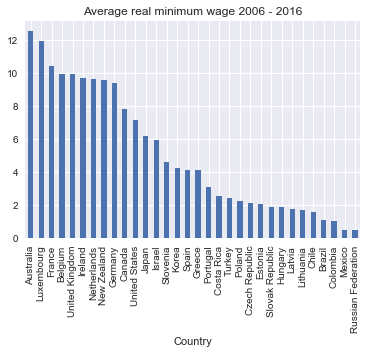

In [195]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

merged.mean().sort_values(ascending=False).plot(
    kind='bar', title="Average real minimum wage 2006 - 2016")

# Set country labels
country_labels = merged.mean().sort_values(
    ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

## columns.get_level_values

In [196]:
merged.columns.get_level_values('Continent').tolist()

['Americas',
 'Americas',
 'Americas',
 'Americas',
 'Americas',
 'Americas',
 'Americas',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Australia',
 'Australia',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe']

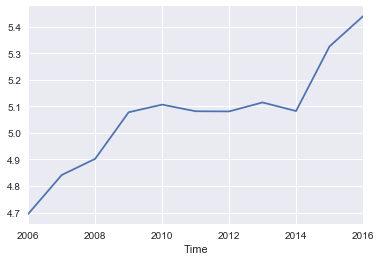

In [197]:
merged.mean(axis=1).plot()

In [198]:
merged.head()

Continent  Americas                   ...         Europe                     
Country      Brazil Canada Chile      ...       Slovenia Spain United Kingdom
Time                                  ...                                    
2006-01-01     0.87   6.89  1.42      ...           3.92  3.99           9.81
2007-01-01     0.92   6.96  1.45      ...           3.88  4.10          10.07
2008-01-01     0.96   7.24  1.44      ...           3.96  4.14          10.04
2009-01-01     1.03   7.67  1.52      ...           4.08  4.32          10.15
2010-01-01     1.08   7.94  1.56      ...           4.81  4.30           9.96

[5 rows x 32 columns]

In [199]:
merged.mean(level='Country', axis=1)

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88
...,...,...,...,...,...,...,...
2012-01-01,12.60,9.95,1.18,...,2.43,9.72,7.48
2013-01-01,12.64,10.04,1.21,...,2.48,9.65,7.38
2014-01-01,12.67,10.01,1.21,...,2.51,9.72,7.26


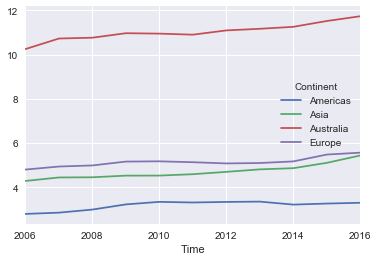

In [200]:
merged.mean(level='Continent', axis=1).plot()

In [201]:
merged.drop('Americas', level=0, axis=1)

Continent    Asia                  ...         Europe                     
Country    Israel Japan Korea      ...       Slovenia Spain United Kingdom
Time                               ...                                    
2006-01-01   5.77  5.69  3.42      ...           3.92  3.99           9.81
2007-01-01   6.03  5.75  3.74      ...           3.88  4.10          10.07
2008-01-01   5.92  5.79  3.87      ...           3.96  4.14          10.04
2009-01-01   5.84  5.99  4.00      ...           4.08  4.32          10.15
2010-01-01   5.68  6.14  3.99      ...           4.81  4.30           9.96
...           ...   ...   ...      ...            ...   ...            ...
2012-01-01   5.82  6.35  4.18      ...           4.94  4.12           9.72
2013-01-01   5.94  6.44  4.38      ...           4.98  4.09           9.65
2014-01-01   5.91  6.39  4.64      ...           5.01  4.10           9.72
2015-01-01   6.31  6.48  4.93      ...           5.05  4.14          10.01
2016-01-01   6.59  6.65  5.28      ...           5.05  4.19          10.26

[11 rows x 25 columns]

In [202]:
merged.stack().describe()

Continent,Americas,Asia,Australia,Europe
count,69.00,44.00,22.00,200.00
mean,3.19,4.70,11.03,5.15
std,3.02,1.56,1.58,3.82
min,0.52,2.22,8.44,0.23
25%,1.03,3.37,9.56,2.02
50%,1.44,5.48,11.27,3.54
75%,6.96,5.95,12.45,9.70
max,8.48,6.65,12.98,12.39


In [203]:
grouped = merged.groupby(level='Continent', axis=1)
grouped

In [204]:
grouped.size()

Continent
Americas      7
Asia          4
Australia     2
Europe       19
dtype: int64

## groups.keys

In [205]:
grouped.groups.keys()

dict_keys(['Australia', 'Asia', 'Europe', 'Americas'])

In [206]:
grouped.get_group('Asia')['2015'].unstack()

Continent  Country  Time      
Asia       Israel   2015-01-01   6.31
           Japan    2015-01-01   6.48
           Korea    2015-01-01   4.93
           Turkey   2015-01-01   2.69
dtype: float64

## grouped.get_group

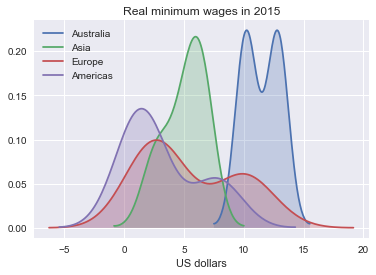

In [207]:
import seaborn as sns

continents = grouped.groups.keys()

for continent in continents:
    sns.kdeplot(grouped.get_group(continent)[
                '2015'].unstack(), label=continent, shade=True)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.show()

## Example 1

In [210]:
employ = pd.read_csv("https://lectures.quantecon.org/_downloads/employ.csv")

In [211]:
employ.set_index(pd.to_datetime(employ.DATE), inplace=True)

In [212]:
employ.drop(['Unnamed: 0', 'DATE'], axis=1, inplace=True)

In [213]:
employ.dropna(how='all', inplace=True)
employ.head()

,GEO,AGE,UNIT,SEX,INDIC_EM,Value
DATE,,,,,,
2007-01-01,European Union (28 countries),From 15 to 24 years,Thousand persons,Total,Active population,"26,839.00"
2007-01-01,European Union (28 countries),From 15 to 24 years,Thousand persons,Total,Total employment (resident population concept ...,"22,669.00"
2007-01-01,European Union (28 countries),From 15 to 24 years,Thousand persons,Males,Active population,"14,665.00"
2007-01-01,European Union (28 countries),From 15 to 24 years,Thousand persons,Males,Total employment (resident population concept ...,"12,430.00"
2007-01-01,European Union (28 countries),From 15 to 24 years,Thousand persons,Females,Active population,"12,173.00"


In [214]:
employ = employ.pivot_table(index='DATE', columns=[
                            'AGE', 'GEO', 'SEX', 'UNIT'], values='Value')
employ

AGE                   From 15 to 24 years                   \
GEO                               Austria                    
SEX                               Females                    
UNIT       Percentage of total population Thousand persons   
DATE                                                         
2007-01-01                          53.30           264.50   
2008-01-01                          53.75           267.00   
2009-01-01                          53.35           265.00   
2010-01-01                          51.45           254.50   
2011-01-01                          52.30           258.00   
2012-01-01                          52.85           260.00   
2013-01-01                          52.55           257.50   
2014-01-01                          52.65           257.00   
2015-01-01                          51.40           249.50   
2016-01-01                          51.80           250.00   

AGE                                             ...         \
GEO                                             ...          
SEX                                 Males       ...          
UNIT       Percentage of total population       ...          
DATE                                            ...          
2007-01-01                          59.95       ...          
2008-01-01                          60.25       ...          
2009-01-01                          59.35       ...          
2010-01-01                          59.60       ...          
2011-01-01                          60.80       ...          
2012-01-01                          60.10       ...          
2013-01-01                          59.35       ...          
2014-01-01                          57.50       ...          
2015-01-01                          57.35       ...          
2016-01-01                          56.55       ...          

AGE        From 55 to 64 years                                                  
GEO             United Kingdom                                                  
SEX                      Males                          Total                   
UNIT          Thousand persons Percentage of total population Thousand persons  
DATE                                                                            
2007-01-01            2,390.00                          58.35         4,199.50  
2008-01-01            2,443.00                          58.90         4,272.00  
2009-01-01            2,444.00                          58.90         4,294.00  
2010-01-01            2,417.00                          58.60         4,290.00  
2011-01-01            2,392.00                          58.20         4,273.50  
2012-01-01            2,407.50                          59.60         4,330.00  
2013-01-01            2,448.00                          61.30         4,446.50  
2014-01-01            2,488.50                          62.25         4,551.00  
2015-01-01            2,545.50                          63.30         4,689.00  
2016-01-01            2,633.00                          64.60         4,873.50  

[10 rows x 720 columns]

In [215]:
employ.xs('Males', level=2, axis=1)

AGE                   From 15 to 24 years                   \
GEO                               Austria                    
UNIT       Percentage of total population Thousand persons   
DATE                                                         
2007-01-01                          59.95           293.50   
2008-01-01                          60.25           297.00   
2009-01-01                          59.35           291.00   
2010-01-01                          59.60           291.50   
2011-01-01                          60.80           296.00   
2012-01-01                          60.10           294.50   
2013-01-01                          59.35           291.00   
2014-01-01                          57.50           280.50   
2015-01-01                          57.35           280.50   
2016-01-01                          56.55           283.00   

AGE                                             ...         \
GEO                               Belgium       ...          
UNIT       Percentage of total population       ...          
DATE                                            ...          
2007-01-01                          33.00       ...          
2008-01-01                          32.85       ...          
2009-01-01                          31.15       ...          
2010-01-01                          31.25       ...          
2011-01-01                          30.90       ...          
2012-01-01                          31.40       ...          
2013-01-01                          29.50       ...          
2014-01-01                          28.40       ...          
2015-01-01                          28.90       ...          
2016-01-01                          27.35       ...          

AGE        From 55 to 64 years                                                  
GEO                     Turkey                 United Kingdom                   
UNIT          Thousand persons Percentage of total population Thousand persons  
DATE                                                                            
2007-01-01              944.50                          67.55         2,390.00  
2008-01-01            1,005.00                          68.50         2,443.00  
2009-01-01            1,066.50                          68.20         2,444.00  
2010-01-01            1,155.00                          67.15         2,417.00  
2011-01-01            1,283.00                          66.25         2,392.00  
2012-01-01            1,370.50                          67.45         2,407.50  
2013-01-01            1,402.00                          68.70         2,448.00  
2014-01-01            1,497.50                          69.35         2,488.50  
2015-01-01            1,580.00                          70.05         2,545.50  
2016-01-01            1,738.50                          71.10         2,633.00  

[10 rows x 240 columns]

In [216]:
for col in employ.columns.names:
    print(col, employ.columns.get_level_values(col).unique())

AGE Index(['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years'], dtype='object', name='AGE')
GEO Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Euro area (17 countries)',
       'Euro area (18 countries)', 'Euro area (19 countries)',
       'European Union (15 countries)', 'European Union (27 countries)',
       'European Union (28 countries)', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'],
      dtype='object', name='GEO')
SEX Index(['Females', 'Males', 'Total'], dtype='object', name='SEX')
UNIT Index(['Percentage of total po

In [218]:
employ.columns = employ.columns.swaplevel(0, 1)
employ = employ.sort_index(axis=1)
employ

GEO                               Austria                   \
AGE                   From 15 to 24 years                    
SEX                               Females                    
UNIT       Percentage of total population Thousand persons   
DATE                                                         
2007-01-01                          53.30           264.50   
2008-01-01                          53.75           267.00   
2009-01-01                          53.35           265.00   
2010-01-01                          51.45           254.50   
2011-01-01                          52.30           258.00   
2012-01-01                          52.85           260.00   
2013-01-01                          52.55           257.50   
2014-01-01                          52.65           257.00   
2015-01-01                          51.40           249.50   
2016-01-01                          51.80           250.00   

GEO                                             ...         \
AGE                                             ...          
SEX                                 Males       ...          
UNIT       Percentage of total population       ...          
DATE                                            ...          
2007-01-01                          59.95       ...          
2008-01-01                          60.25       ...          
2009-01-01                          59.35       ...          
2010-01-01                          59.60       ...          
2011-01-01                          60.80       ...          
2012-01-01                          60.10       ...          
2013-01-01                          59.35       ...          
2014-01-01                          57.50       ...          
2015-01-01                          57.35       ...          
2016-01-01                          56.55       ...          

GEO             United Kingdom                                                  
AGE        From 55 to 64 years                                                  
SEX                      Males                          Total                   
UNIT          Thousand persons Percentage of total population Thousand persons  
DATE                                                                            
2007-01-01            2,390.00                          58.35         4,199.50  
2008-01-01            2,443.00                          58.90         4,272.00  
2009-01-01            2,444.00                          58.90         4,294.00  
2010-01-01            2,417.00                          58.60         4,290.00  
2011-01-01            2,392.00                          58.20         4,273.50  
2012-01-01            2,407.50                          59.60         4,330.00  
2013-01-01            2,448.00                          61.30         4,446.50  
2014-01-01            2,488.50                          62.25         4,551.00  
2015-01-01            2,545.50                          63.30         4,689.00  
2016-01-01            2,633.00                          64.60         4,873.50  

[10 rows x 720 columns]

In [219]:
geo_list = employ.columns.get_level_values('GEO').unique().tolist()
countries = [x for x in geo_list if not x.startswith('Euro')]
employ = employ[countries]
employ.columns.get_level_values('GEO').unique()

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'],
      dtype='object', name='GEO')

In [221]:
geog = employ.columns.get_level_values('GEO').unique().tolist()
geog2 = [i for i in geog if not i.startswith('Euro')]  # starts

In [222]:
employ = employ[geog2]

In [223]:
employ_f = employ.xs(('Percentage of total population'),
                     level=('UNIT'),
                     axis=1)
employ_f.head()

GEO                    Austria              ...       United Kingdom        \
AGE        From 15 to 24 years              ...  From 55 to 64 years         
SEX                    Females Males Total  ...              Females Males   
DATE                                        ...                              
2007-01-01               53.30 59.95 56.60  ...                49.35 67.55   
2008-01-01               53.75 60.25 56.95  ...                49.60 68.50   
2009-01-01               53.35 59.35 56.30  ...                49.90 68.20   
2010-01-01               51.45 59.60 55.55  ...                50.30 67.15   
2011-01-01               52.30 60.80 56.55  ...                50.40 66.25   

GEO               
AGE               
SEX        Total  
DATE              
2007-01-01 58.35  
2008-01-01 58.90  
2009-01-01 58.90  
2010-01-01 58.60  
2011-01-01 58.20  

[5 rows x 306 columns]

In [224]:
employ_f = employ_f.drop('Total', level='SEX', axis=1)
employ_f

GEO                    Austria                            ...   \
AGE        From 15 to 24 years       From 25 to 54 years  ...    
SEX                    Females Males             Females  ...    
DATE                                                      ...    
2007-01-01               53.30 59.95               78.60  ...    
2008-01-01               53.75 60.25               79.35  ...    
2009-01-01               53.35 59.35               80.25  ...    
2010-01-01               51.45 59.60               80.65  ...    
2011-01-01               52.30 60.80               81.50  ...    
2012-01-01               52.85 60.10               82.20  ...    
2013-01-01               52.55 59.35               82.50  ...    
2014-01-01               52.65 57.50               82.40  ...    
2015-01-01               51.40 57.35               82.35  ...    
2016-01-01               51.80 56.55               82.75  ...    

GEO             United Kingdom                            
AGE        From 25 to 54 years From 55 to 64 years        
SEX                      Males             Females Males  
DATE                                                      
2007-01-01               89.90               49.35 67.55  
2008-01-01               89.65               49.60 68.50  
2009-01-01               88.70               49.90 68.20  
2010-01-01               88.40               50.30 67.15  
2011-01-01               88.80               50.40 66.25  
2012-01-01               89.30               52.00 67.45  
2013-01-01               89.35               54.15 68.70  
2014-01-01               90.10               55.40 69.35  
2015-01-01               90.10               56.85 70.05  
2016-01-01               90.60               58.30 71.10  

[10 rows x 204 columns]

In [225]:
box = employ_f['2015'].unstack().reset_index()
box

,GEO,AGE,SEX,DATE,0
0,Austria,From 15 to 24 years,Females,2015-01-01,51.40
1,Austria,From 15 to 24 years,Males,2015-01-01,57.35
2,Austria,From 25 to 54 years,Females,2015-01-01,82.35
3,Austria,From 25 to 54 years,Males,2015-01-01,89.10
4,Austria,From 55 to 64 years,Females,2015-01-01,39.50
...,...,...,...,...,...
199,United Kingdom,From 15 to 24 years,Males,2015-01-01,55.25
200,United Kingdom,From 25 to 54 years,Females,2015-01-01,78.25
201,United Kingdom,From 25 to 54 years,Males,2015-01-01,90.10
202,United Kingdom,From 55 to 64 years,Females,2015-01-01,56.85


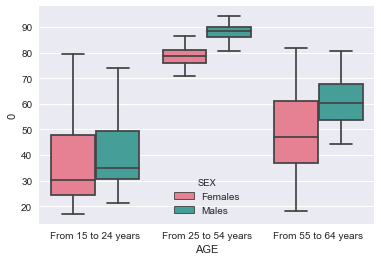

In [226]:
sns.boxplot(
    x="AGE", y=0, hue="SEX", data=box, palette=("husl"), showfliers=False)